In [1]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from IPython.display import Image

In [2]:
retailDF = spark\
    .read.option("header", "true")\
    .option("inferSchema", "true")\
    .csv("../dataset/online_retail.csv")

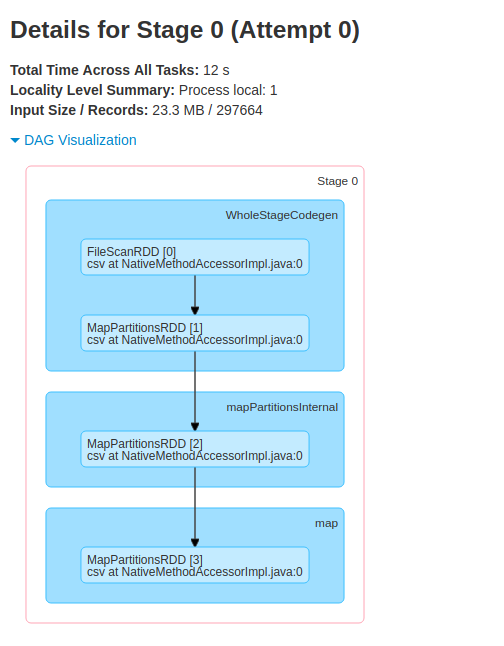

In [7]:
Image("../images/data_read.png")

In [3]:
retailDF = retailDF\
    .withColumn("Quantity",
                col("Quantity") + 1)

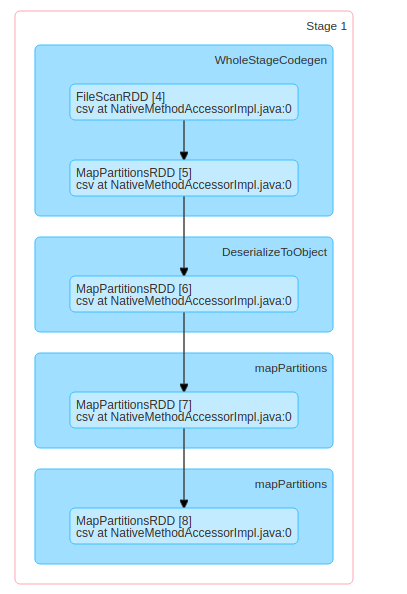

In [8]:
Image("../images/data_read_and_operation1.png")

In [4]:
retailDF = retailDF\
    .withColumn("Amount", col("Quantity") * col("UnitPrice"))

In [5]:
retailDF.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+------------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|            Amount|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+------------------+
|   536365|   85123A|WHITE HANGING HEA...|       7|01/12/10 08:26|     2.55|     17850|United Kingdom|17.849999999999998|
|   536365|    71053| WHITE METAL LANTERN|       7|01/12/10 08:26|     3.39|     17850|United Kingdom|             23.73|
|   536365|   84406B|CREAM CUPID HEART...|       9|01/12/10 08:26|     2.75|     17850|United Kingdom|             24.75|
|   536365|   84029G|KNITTED UNION FLA...|       7|01/12/10 08:26|     3.39|     17850|United Kingdom|             23.73|
|   536365|   84029E|RED WOOLLY HOTTIE...|       7|01/12/10 08:26|     3.39|     17850|United Kingdom|             23.73|
|   536365|    22752|SET

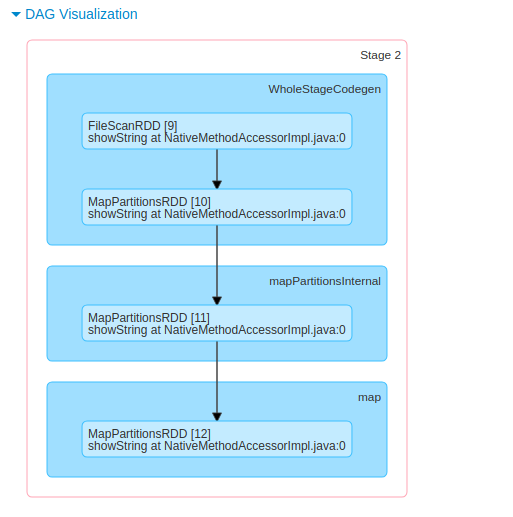

In [11]:
Image("../images/show_operation.png")

In [6]:
squarer = udf(lambda z: z**2, DoubleType())

In [7]:
retailDF = retailDF\
    .withColumn("SquaredUnitPrice", squarer(col("UnitPrice")))
retailDF.select("UnitPrice", "SquaredUnitPrice").show()

+---------+------------------+
|UnitPrice|  SquaredUnitPrice|
+---------+------------------+
|     2.55|6.5024999999999995|
|     3.39|           11.4921|
|     2.75|            7.5625|
|     3.39|           11.4921|
|     3.39|           11.4921|
|     7.65| 58.52250000000001|
|     4.25|           18.0625|
|     1.85|3.4225000000000003|
|     1.85|3.4225000000000003|
|     1.69|2.8560999999999996|
|      2.1|              4.41|
|      2.1|              4.41|
|     3.75|           14.0625|
|     1.65|2.7224999999999997|
|     4.25|           18.0625|
|     4.95|           24.5025|
|     9.95| 99.00249999999998|
|     5.95|           35.4025|
|     5.95|           35.4025|
|     7.95|           63.2025|
+---------+------------------+
only showing top 20 rows



In [8]:
retailDF = retailDF\
    .withColumn("ReferenceID", monotonically_increasing_id())

In [22]:
productDF = retailDF.groupBy("Description")\
    .agg(collect_set(struct(col("Quantity"),col("UnitPrice"),
                            col("ReferenceID")))
         .alias('QuantAndUnitPrice'))

In [ ]:
def PriceCalculator():
    ?